Coding-Big Data Technologies Assignment

Submitted by

NIDIN V NANDAN

Reg No:223039

In [ ]:
#enabling SparkSession and SprkContext
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [ ]:
#importing necessary libraries

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col,sum,count
import matplotlib.pyplot as plt

In [ ]:
#uploading the dataset
dataset =spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/nidinvnandan321@gmail.com/Sample___Superstore-4.csv")

In [ ]:
#Getting 5 rows from the dataset
dataset.show(5)

+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|  Customer Name|  Segment|      Country|           City|     State|Postal Code|Region|     Product ID|       Category|Sub-Category|        Product Name|   Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156| 11/8/2016|11/11/2016|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furniture|   Bookcases|Bush Somerset 

In [ ]:
#printing the schema
dataset.printSchema()

root
 |-- Row ID: string (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Profit: string (nullable = true)



In [ ]:
#describing the data
dataset.describe().toPandas().transpose()


,0,1,2,3,4
summary,count,mean,stddev,min,max
Row ID,9994,4997.5,2885.1636290974325,1,9994
Order ID,9994,None,None,CA-2014-100006,US-2017-169551
Order Date,9994,None,None,1/1/2017,9/9/2017
Ship Date,9994,None,None,1/1/2015,9/9/2017
Ship Mode,9994,None,None,First Class,Standard Class
Customer ID,9994,None,None,AA-10315,ZD-21925
Customer Name,9994,None,None,Aaron Bergman,Zuschuss Donatelli
Segment,9994,None,None,Consumer,Home Office
Country,9994,None,None,United States,United States


In [ ]:
#code to display the count of the unique values

columns_to_check = ["Ship Mode", "Customer ID", "Customer Name", "Segment", "Country", "City", "State", "Postal Code", "Region", "Product ID", "Category", "Sub-Category", "Product Name"]

# Create an empty dictionary to store the counts
unique_counts = {}

# Iterate over the columns and find the unique values and counts
for column in columns_to_check:
    unique_counts[column] = dataset.groupBy(column).agg(count("*").alias("count"))

# Print the unique values and their counts
for column, counts in unique_counts.items():
    print(f"Unique values and their counts in column '{column}':")
    counts.show()

Unique values and their counts in column 'Ship Mode':
+--------------+-----+
|     Ship Mode|count|
+--------------+-----+
|   First Class| 1538|
|      Same Day|  543|
|  Second Class| 1945|
|Standard Class| 5968|
+--------------+-----+

Unique values and their counts in column 'Customer ID':
+-----------+-----+
|Customer ID|count|
+-----------+-----+
|   VW-21775|   18|
|   PB-19210|    2|
|   RR-19315|    4|
|   EM-13960|    6|
|   MY-17380|   13|
|   MS-17530|    7|
|   KH-16630|   17|
|   BD-11500|   10|
|   SW-20275|    7|
|   AH-10690|   23|
|   PH-18790|    2|
|   JF-15490|   15|
|   JF-15415|   14|
|   IM-15070|   21|
|   PW-19240|   12|
|   JH-15985|   14|
|   OT-18730|   10|
|   KM-16225|   19|
|   NW-18400|   22|
|   KF-16285|   18|
+-----------+-----+
only showing top 20 rows

Unique values and their counts in column 'Customer Name':
+-----------------+-----+
|    Customer Name|count|
+-----------------+-----+
|     Jesus Ocampo|   11|
|      Jim Mitchum|   12|
|     Ruben

In [ ]:
# Cast the required columns to float 
from pyspark.sql.functions import col
columns_to_cast =  [
 'Postal Code',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']
d_temp = (
   dataset
   .select(
     *(c1 for c1 in dataset.columns if c1 not in columns_to_cast),
     *(col(c1).cast("float").alias(c1) for c1 in columns_to_cast)
   )
)
 

In [ ]:
d_temp.printSchema()

root
 |-- Row ID: string (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Postal Code: float (nullable = true)
 |-- Sales: float (nullable = true)
 |-- Quantity: float (nullable = true)
 |-- Discount: float (nullable = true)
 |-- Profit: float (nullable = true)



In [ ]:
from pyspark.ml.feature import StringIndexer

#doing label encoding
# List of columns to label encode
columns_to_label_encode = ["Ship Mode", "Segment","City", "State", "Region", "Category", "Sub-Category"]

# Create a StringIndexer for each column and fit/transform it in place
for column in columns_to_label_encode:
    indexer = StringIndexer(inputCol=column, outputCol=column + "_index")
    model = indexer.fit(d_temp)
    d_temp = model.transform(d_temp)
    d_temp = d_temp.drop(column)  # Remove the original column

# Show the resulting DataFrame
d_temp.show()


+------+--------------+----------+----------+-----------+------------------+-------------+---------------+--------------------+-----------+--------+--------+--------+--------+---------------+-------------+----------+-----------+------------+--------------+------------------+
|Row ID|      Order ID|Order Date| Ship Date|Customer ID|     Customer Name|      Country|     Product ID|        Product Name|Postal Code|   Sales|Quantity|Discount|  Profit|Ship Mode_index|Segment_index|City_index|State_index|Region_index|Category_index|Sub-Category_index|
+------+--------------+----------+----------+-----------+------------------+-------------+---------------+--------------------+-----------+--------+--------+--------+--------+---------------+-------------+----------+-----------+------------+--------------+------------------+
|     1|CA-2016-152156| 11/8/2016|11/11/2016|   CG-12520|       Claire Gute|United States|FUR-BO-10001798|Bush Somerset Col...|    42420.0|  261.96|     2.0|     0.0| 41.91

In [ ]:
d_temp.columns

Out[32]: ['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Customer ID',
 'Customer Name',
 'Country',
 'Product ID',
 'Product Name',
 'Postal Code',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Ship Mode_index',
 'Segment_index',
 'City_index',
 'State_index',
 'Region_index',
 'Category_index',
 'Sub-Category_index']

In [ ]:
#VectorAssembler method to stack all our features columns together and return them as the “features” columns by the output column parameter.
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=[
 'Postal Code',
 'Sales',
 'Quantity',
 'Discount','Ship Mode_index', "Segment_index","City_index", "State_index", "Region_index", "Category_index", "Sub-Category_index"]
,
    outputCol="features",handleInvalid="skip")

In [ ]:
transform_d = assembler.transform(d_temp)

In [ ]:
trainable_d = transform_d.select("features",'Profit')

In [ ]:
trainable_d.show()


+--------------------+--------+
|            features|  Profit|
+--------------------+--------+
|[42420.0,261.9599...| 41.9136|
|[42420.0,731.9400...| 219.582|
|[90036.0,14.61999...|  6.8714|
|[33311.0,957.5775...|-383.031|
|[33311.0,22.36800...|  2.5164|
|(11,[0,1,2,6,9,10...| 14.1694|
|(11,[0,1,2,6,10],...|  1.9656|
|[90032.0,907.1519...| 90.7152|
|(11,[0,1,2,3,6],[...|  5.7825|
|(11,[0,1,2,6,10],...|   34.47|
|[90032.0,1706.183...| 85.3092|
|[90032.0,911.4240...| 68.3568|
|[28027.0,15.55200...|  5.4432|
|(11,[0,1,2,3,6,7]...|132.5922|
|[76106.0,68.80999...|-123.858|
|[76106.0,2.543999...|  -3.816|
|[53711.0,665.8800...| 13.3176|
|[84084.0,55.5,2.0...|    9.99|
|(11,[0,1,2,4,6,10...|  2.4824|
|[94109.0,213.4799...|  16.011|
+--------------------+--------+
only showing top 20 rows



In [ ]:
train_data,test_data = trainable_d.randomSplit([0.7,0.3])

In [ ]:
train_data.show()

+--------------------+-------+
|            features| Profit|
+--------------------+-------+
|(11,[0,1,2,3,4,6]...| 13.734|
|(11,[0,1,2,3,4,6]...|13.0375|
|(11,[0,1,2,3,4,6]...|19.4184|
|(11,[0,1,2,3,4,6]...| 50.414|
|(11,[0,1,2,3,4,6]...|152.495|
|(11,[0,1,2,3,4,6]...| 1.8144|
|(11,[0,1,2,3,4,6]...| 13.734|
|(11,[0,1,2,3,4,6]...| 2.8836|
|(11,[0,1,2,3,4,6]...| 3.9498|
|(11,[0,1,2,3,4,6]...|   4.49|
|(11,[0,1,2,3,4,6]...| 5.5071|
|(11,[0,1,2,3,4,6]...|  1.971|
|(11,[0,1,2,3,4,6]...| 3.2676|
|(11,[0,1,2,3,4,6]...|13.3476|
|(11,[0,1,2,3,4,6]...|89.9548|
|(11,[0,1,2,3,4,6]...|302.373|
|(11,[0,1,2,3,4,6]...| 6.4206|
|(11,[0,1,2,3,4,6]...| 30.186|
|(11,[0,1,2,3,4,6]...| 3.1552|
|(11,[0,1,2,3,4,6]...|124.485|
+--------------------+-------+
only showing top 20 rows



In [ ]:
test_data.describe().show()

+-------+------------------+
|summary|            Profit|
+-------+------------------+
|  count|              2886|
|   mean|  25.6310225093785|
| stddev|186.86316212511286|
|    min|        -3701.8928|
|    max|         4630.4756|
+-------+------------------+



In [ ]:
#importing Linear Regression
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol='Profit',featuresCol='features')

In [ ]:
lrModel = lr.fit(train_data,)

In [ ]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [4.6819738242245445e-05,0.19255710108984456,-3.751199862089213,-266.6117167792317,-1.0614620849938539,0.7715749742468547,0.023494745323506316,-0.034857865308872894,2.707545688940272,-9.84914424001243,-5.8537570925931695] Intercept: 66.4926560856605


In [ ]:
test_results = lrModel.evaluate(test_data)

In [ ]:
test_results.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|  4.367433219666992|
|-11.039886294642606|
|-2.1723479965367076|
|  4.629796737187178|
|-11.908259321614032|
| -6.866520359883054|
| -7.004529686486869|
| 172.90926330085387|
|-10.777796522049073|
| -2.049956182262207|
| -8.074860009093726|
|-3.8905139381715728|
| -2.821012384186517|
|  -8.10196332330095|
|  32.51893494937289|
| -6.002386171843227|
| 1.8179207045473476|
| -4.684594071459998|
|  20.80547889793867|
|  7.688415851392648|
+-------------------+
only showing top 20 rows



In [ ]:
predictions = lrModel.transform(test_data)

In [ ]:
predictions.show()

+--------------------+-------+--------------------+
|            features| Profit|          prediction|
+--------------------+-------+--------------------+
|(11,[0,1,2,3,4,6]...|  4.176|-0.19143310141137704|
|(11,[0,1,2,3,4,6]...| 3.8168|  14.856686412135282|
|(11,[0,1,2,3,4,6]...| 4.1328|   6.305148098770594|
|(11,[0,1,2,3,4,6]...| 31.374|   26.74420381212923|
|(11,[0,1,2,3,4,6]...| 1.6038|    13.5120593799789|
|(11,[0,1,2,3,4,6]...| 4.2224|    11.0889205483291|
|(11,[0,1,2,3,4,6]...| 4.5188|  11.523329468286185|
|(11,[0,1,2,3,4,6]...|381.297|  208.38773376945863|
|(11,[0,1,2,3,4,6]...|  3.942|  14.719796434311036|
|(11,[0,1,2,3,4,6]...|  2.352|   4.401956180354858|
|(11,[0,1,2,3,4,6]...|16.3352|  24.410059365172827|
|(11,[0,1,2,3,4,6]...| 8.8624|  12.752913993103213|
|(11,[0,1,2,3,4,6]...|16.3352|   19.15621174026562|
|(11,[0,1,2,3,4,6]...| 5.1184|   13.22036342019426|
|(11,[0,1,2,3,4,6]...| 77.714|   45.19506193783414|
|(11,[0,1,2,3,4,6]...| 2.2302|    8.23258622410458|
|(11,[0,1,2,

In [ ]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))

RMSE: 160.49993693030336
MSE: 25760.229754631353


In [ ]:
x_ax = range(0, predictions.count())
y_pred = predictions.select("prediction").collect()
y_orig = predictions.select("Profit").collect()  
 

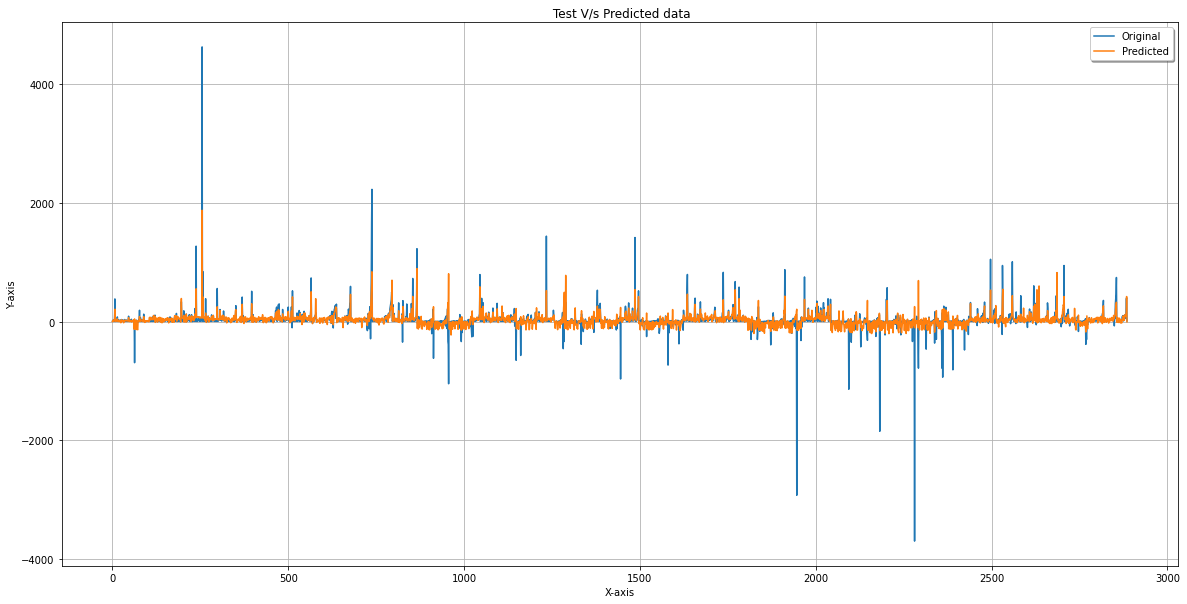

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_orig, label="Original")
plt.plot(x_ax, y_pred, label="Predicted")
plt.title(" Test V/s Predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Mention the purpose of the model you are creating.

The purpose of the model is to perform linear regression on the provided dataset, specifically to predict the 'Profit' based on the input features contained in the "features" column ie('Postal Code',
 'Sales','Quantity','Discount','Ship Mode_index', "Segment_index","City_index", "State_index", "Region_index", "Category_index", "Sub-Category_index").As we know Linear regression is a statistical method used to model the relationship between a dependent variable (in this case, 'Profit') and one or more independent variables (the features ). The model will aim to learn the linear relationship between these variables to make predictions about the 'Profit' given a set of feature values. This can be valuable for understanding how the different input features influence the profitability of the data, and for making profit predictions based on new data points in the future.
 So this model have a clear purpose







why did you choose the specific algorithm?


The choice of the linear regression algorithm in this problem is based on the nature of the problem and the assumptions that underlie linear regression
Since the goal is to predict a continuous numeric value ('Profit'), linear regression is a natural choice as it is primarily designed for regression tasks.
Linear regression assumes that there is a linear relationship between the input features and the target variable ('Profit' in this case).This is a reasonable assumption for many real-world scenarios, and it allows the model to capture and quantify how changes in the input features impact the target variable.
And also this is a good model which give some good result

What is the expected output?


The expected output of the code is to predict the "Profit" considering the features column ie('Postal Code', 'Sales','Quantity','Discount','Ship Mode_index', "Segment_index","City_index", "State_index", "Region_index", "Category_index", "Sub-Category_index").For each data point or observation in the data, the model will produce a predicted profit value. These values are calculated using the learned coefficients and the input features of the data.